# Problema 1

### US Police Violence & Fatal Shootings (Violenza delle Polizia Americana e uccisioni)
Data from a variety of sources to support objective analysis

https://www.kaggle.com/jpmiller/police-violence-in-the-us/data?select=deaths_and_stats.csv

## Commento generale

Più che un problema di programmazione spesso è un problema di comprensione della domanda.   
Leggere bene la richiesta del quesito è già comprendere un po' della risposta  

Per es. se vi viene chiesto "Quanti sono le caravelle di Cristoforo Colombo?", non potete rispondere:   
La nina, la pinta e la S.Maria!

In [4]:
import pandas as pd
import datetime
import numpy as np

In [5]:
# Non cambiare
data = pd.read_csv("deaths_and_stats.csv")

In [6]:
data.head(3)

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Violent crimes 2015 (if reported by agency),Violent crimes 2016 (if reported by agency),Violent crimes 2017 (if reported by agency),Violent crimes 2018 (if reported by agency),2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests
0,Alabama,Birmingham,Birmingham Police Department,4.0,NaN,NaN,NaN,NaN,3.0,NaN,...,3707.0,NaN,NaN,4025.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3226.0,3422.0,3564.0,3824.0,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0
2,Arizona,Chandler,Chandler Police Department,NaN,3.0,NaN,NaN,NaN,2.0,NaN,...,490.0,558.0,647.0,606.0,6257.0,6105.0,6256.0,6151.0,6660.0,6538.0


## Considera solo il dataframe con gli arresti effettuati dal 2013 al 2018

In [7]:
cols = np.concatenate((data.columns[:3], data.columns[-6:]))
data = data[cols]

In [8]:
data.head(5)

,State,City,PD,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests
0,Alabama,Birmingham,Birmingham Police Department,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,Anchorage,Anchorage Police Department,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0
2,Arizona,Chandler,Chandler Police Department,6257.0,6105.0,6256.0,6151.0,6660.0,6538.0
3,Arizona,Glendale,Glendale Police Department,4530.0,3477.0,3692.0,NaN,2949.0,5405.0
4,Arizona,Mesa,Mesa Police Department,24509.0,24120.0,25723.0,22995.0,24344.0,20800.0


## Q1.1 Quanti Police Departments ci sono negli USA?

**Linee/Punti**: 1 linea, 1 pnt  

In [9]:
len(data)

100

In [10]:
# Ancora meglio
len(set(data.PD))

100

## Q1.2 Quanti Police Departments ci sono nello stato del Texas?

**Linee/Punti**: 1 linea, 2 pnts   

In [11]:
len(data[data.State == "Texas"]) # Perché invece molti hanno mostrato i PD di tutti gli stati?

13

## Q1.3 Crea un nuovo dataframe con gli arresti effettuati nei singoli stati (per ciascuno dei sei anni considerati). Considera questo dataframe per le domande successive

**Linee/Punti**: 1 linea (max 3 linee), 2 pnts   
**Suggerimento**: Lo Stato diventa l'indice del dataframe

### Cosa può voler dire "con gli arresti effettuati nei singoli stati"???

### Ovviamente ridefinire l'index non è sufficiente! Uno sguardo veloce sarebbe stato sufficiente per vedere che gli stati sono ripetuti per ogni PD....

In [14]:
arrested_per_state = data.groupby("State").sum()

In [13]:
arrested_per_state.head()

,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests
State,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0
Alaska,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0
Arizona,148347.0,135499.0,76875.0,115989.0,124099.0,123346.0
California,308383.0,310691.0,279583.0,264880.0,249156.0,243218.0
Colorado,60631.0,70537.0,71293.0,67937.0,66741.0,61852.0


## Q1.4 Rinomina le colonne con il solo anno considerato
**Linee/Punti**: max 2 linee, 2 pnts   
**Suggerimento**: Rinominare usando le informazioni delle colonne, senza riscrivere 2013, 2014, etc

In [54]:
arrested_per_state.columns = [col.split(" ")[0] for col in arrested_per_state.columns]

In [17]:
arrested_per_state.columns = arrested_per_state.columns.str[:4] # Questo è persino più brillante

In [18]:
arrested_per_state.head()

,2013,2014,2015,2016,2017,2018
State,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0
Alaska,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0
Arizona,148347.0,135499.0,76875.0,115989.0,124099.0,123346.0
California,308383.0,310691.0,279583.0,264880.0,249156.0,243218.0
Colorado,60631.0,70537.0,71293.0,67937.0,66741.0,61852.0


## Q1.5 Eliminare gli stati per cui non si hanno dati in tutti gli anni (come l'Alabama)

**Mark**: max 2 lines, 2 pnts   

### Attenzione qui a utlizzare dropna(), perché i valori esistono per tutti, anche se sono talvolta zero. Meglio andare sul sicuro

In [23]:
arrested_per_state = arrested_per_state[arrested_per_state.sum(axis=1) > 0] # Sommo sulle righe

In [24]:
arrested_per_state.head()

,2013,2014,2015,2016,2017,2018
State,,,,,,
Alaska,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0
Arizona,148347.0,135499.0,76875.0,115989.0,124099.0,123346.0
California,308383.0,310691.0,279583.0,264880.0,249156.0,243218.0
Colorado,60631.0,70537.0,71293.0,67937.0,66741.0,61852.0
District of Columbia,41630.0,41186.0,36219.0,44175.0,53028.0,47147.0


## Q1.6 Invertire le righe con le colonne

**Linee/Punti**: 1 linea, 2 pnts   

In [25]:
arrested_per_state = arrested_per_state.T # equivalente a arrested_per_state.transpose()

In [26]:
arrested_per_state.head()

State,Alaska,Arizona,California,Colorado,District of Columbia,Florida,Georgia,Illinois,Indiana,Kansas,...,North Carolina,Ohio,Oklahoma,Oregon,Pennsylvania,Tennessee,Texas,Virginia,Washington,Wisconsin
2013,17601.0,148347.0,308383.0,60631.0,41630.0,133277.0,30505.0,112862.0,39493.0,10566.0,...,90093.0,21990.0,35690.0,0.0,104121.0,99538.0,359373.0,51147.0,25754.0,51135.0
2014,14748.0,135499.0,310691.0,70537.0,41186.0,126267.0,26958.0,100346.0,39156.0,9323.0,...,64516.0,17182.0,34254.0,20160.0,98205.0,87033.0,300192.0,47165.0,31717.0,41913.0
2015,14387.0,76875.0,279583.0,71293.0,36219.0,114661.0,0.0,84215.0,44674.0,9307.0,...,59715.0,16383.0,35429.0,0.0,82235.0,80121.0,283852.0,38878.0,38024.0,36464.0
2016,13294.0,115989.0,264880.0,67937.0,44175.0,102063.0,22161.0,61507.0,42600.0,9120.0,...,54254.0,13975.0,32885.0,20322.0,65704.0,74564.0,273124.0,34560.0,14569.0,32509.0
2017,13871.0,124099.0,249156.0,66741.0,53028.0,90420.0,22581.0,57523.0,46362.0,8322.0,...,40651.0,28226.0,29912.0,19107.0,66223.0,70614.0,258067.0,35440.0,19494.0,31949.0


## Q1.7 Mostrare l'andamento degli arresti negli anni in California. Inserire i nomi degli assi per una maggiore comprensione del grafico.

**Linee/Punti**: max 3 linee, 2 pnts   

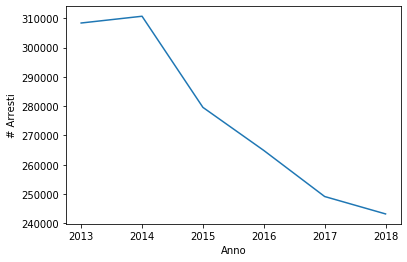

In [27]:
ax = arrested_per_state['California'].plot()
ax.set_xlabel("Anno")
ax.set_ylabel("# Arresti");

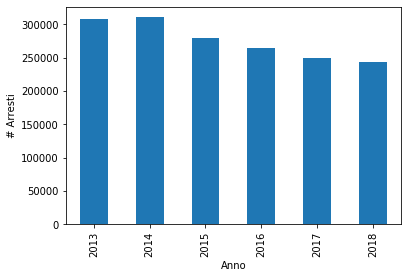

In [28]:
ax = arrested_per_state['California'].plot(kind='bar')
ax.set_xlabel("Anno")
ax.set_ylabel("# Arresti");

## Q1.8 Quali sono i 5 stati con le medie annuali di arresti più alte?

**Linee/Punti**: max 3 linee, 2 pnts   

In [29]:
arrested_per_state.mean().sort_values(ascending=False)[:5].round(0)

State
New York      340099.0
Texas         288166.0
California    275985.0
Arizona       120692.0
Florida       109795.0
dtype: float64

## PS. Secondo questo database, in media un "black" viene ucciso ogni 3 giorni. 